<a href="https://colab.research.google.com/github/Shahrukh2016/Cardiovascular_Risk_Prediction/blob/main/IndividualColab_CardiovascularRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Supervised Classification
##### **Contribution**    - Individual Notebook

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Shahrukh2016/Cardiovascular_Risk_Prediction

# **Problem Statement**


The dataset is from ongoing cardiovascular study  on residents of the town of Framingham, Massachutts. The classification goal is to predict whether the patient has a 10-year risk of failure coronary heart disease(CHD). The dataset provides the patient's information . It includes over 4000 records and 15 attributes. Each attribute is a potental risk factor. There are both demographic, behavioral, and medical risk factor.

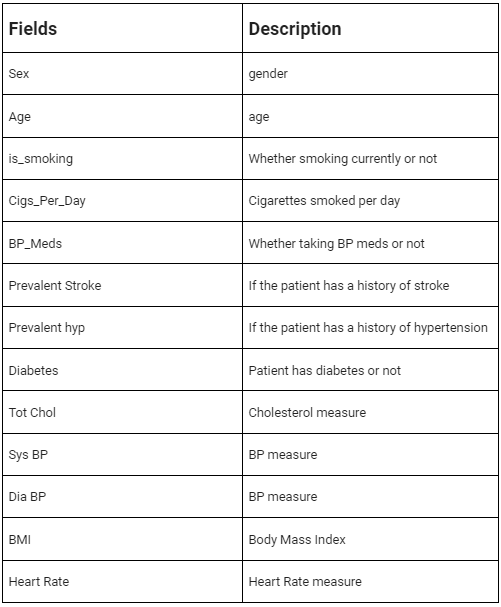

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [193]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import missingno as msno 

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/CP3_Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

### Dataset First View

In [196]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [197]:
# Dataset Rows & Columns count
print(f"Cardiovascular Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Cardiovascular Dataset: Rows= 3390, Columns= 17


### Dataset Information

In [198]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [199]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


Its good to see that we do not have any duplicated observations in our dataset.

#### Missing Values/Null Values

In [200]:
# Missing Values/Null Values Count
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

Null value count in each of the variable: 
--------------------------------------------------
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
--------------------------------------------------


In [201]:
# Let's find out the percentage of null values in each category in order to deal with it accordingly
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable.sort_values(ascending=False)*100}%")
print("-"*50)

Percentage of null values in each variable: 
--------------------------------------------------
glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64%
--------------------------------------------------


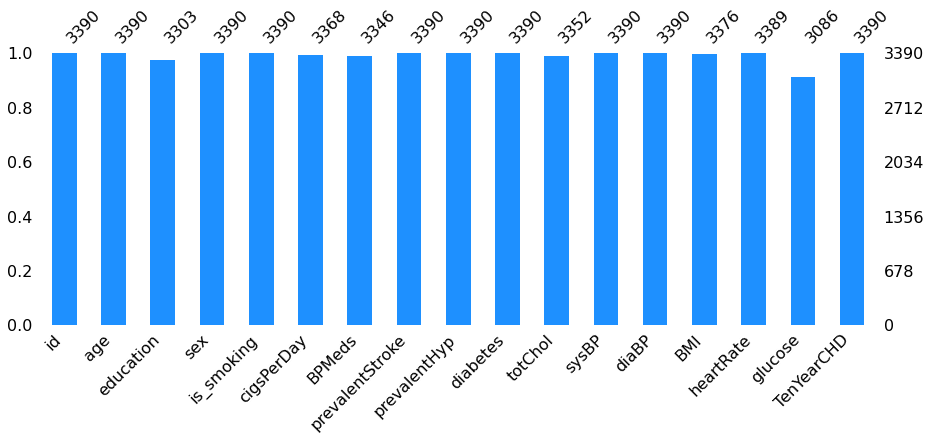

In [202]:
# Visualizing the missing values
msno.bar(df,figsize=(15,5), color="dodgerblue")

### What did you know about your dataset?

We get to know the following points about our dataset:
1. The dataset contains 3390 rows and 17 columns.
2. The dataset don't have any duplicated observations.
3. 'sex' and 'is_smoking' feature is of object dype and rest others are numeric in nature.
4. The null values present in 'glucose', 'education', 'BPMeds', 'totChol', cigsPerDay' and 'BMI' features with the percentage of 8.96%, 2.56%, 1.29%, 1.12%, 0.64%, 0.41% respectively.

## ***2. Understanding Your Variables***

In [203]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [204]:
# Dataset Describe
df.describe(include="all")

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [205]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'id' : 3390
'age' : 39
'education' : 4
'sex' : 2
'is_smoking' : 2
'cigsPerDay' : 32
'BPMeds' : 2
'prevalentStroke' : 2
'prevalentHyp' : 2
'diabetes' : 2
'totChol' : 240
'sysBP' : 226
'diaBP' : 142
'BMI' : 1259
'heartRate' : 68
'glucose' : 132
'TenYearCHD' : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [206]:
# Write your code to make your dataset analysis ready.

In order to impute the null values with the various statistical value (Mean, Median, Mode) we have to check the following things:
1. Distribution of data
2. Outliers in the data

In [207]:
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

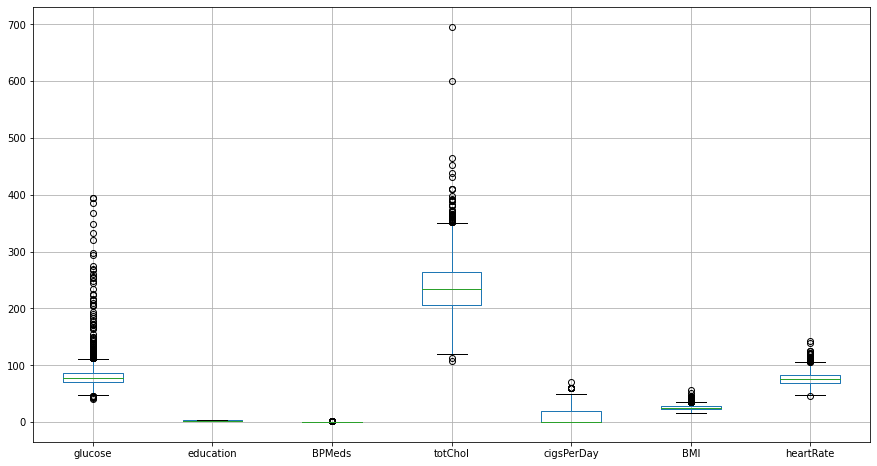

In [208]:
# Plotting the box plot and observe the outliers in the columns having null values
plt.figure(figsize=(15,8))
df[null_list].boxplot()

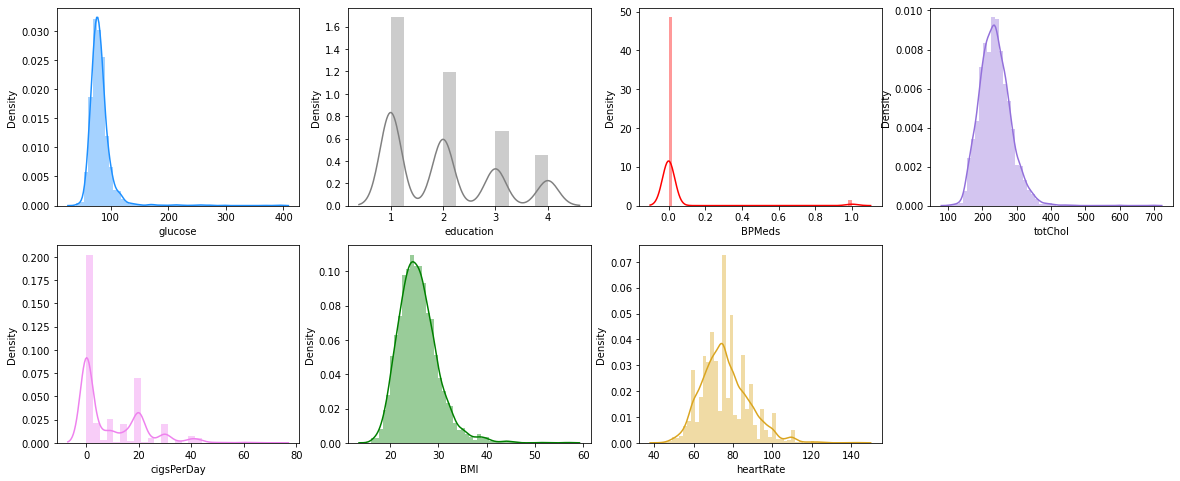

In [209]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,8))
colour= ['dodgerblue','grey','red','mediumpurple','violet','green','goldenrod','lime']
for i,j in zip(null_list, colour):
  ax= plt.subplot(2,4,null_list.index(i)+1)
  sns.distplot(df[i],color=j)
plt.show()

We know that:
1. Mean is used when we have normal distributed data and do not contain any outlier.
2. Median is used  when the data is numerical, continous and contains extreme values (outliers).
3. Mode is used when the data is categorical in nature.

By checking the outliers and distribution of the data we are going to impute the null values of:
1. "glucose" -> Median
2. "education" -> Mode
3. "BPMeds" -> Mode
4. "totChol" -> Median
5. "cigsPerDay" -> Median
6. "BMI" -> Median
7. "heartRate" -> Median

In [210]:
# Filling up the NaN values of each feature
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [211]:
# Rechecking the null values in the dataset after imputing with different statistical values
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [212]:
# Separating the categorical and continous variable and storing them into different lists (excluding 'id')
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <10:
    categorical_variable.append(i)
  elif df[i].nunique() >= 10:
    continous_variable.append(i)

In [213]:
# Checking the definded lists
print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### Univariate Analysis

#### Chart - 1

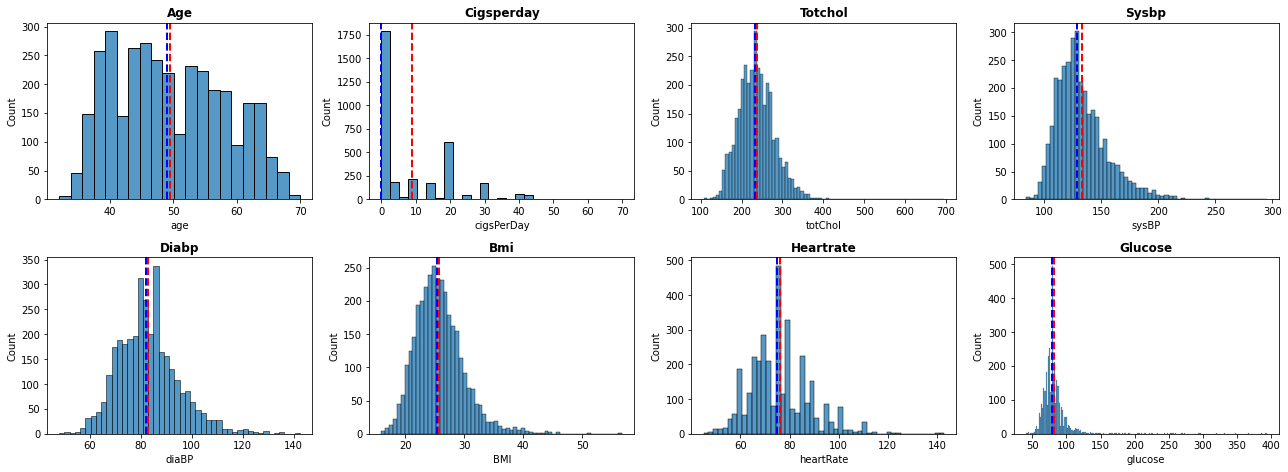

In [214]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(continous_variable):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

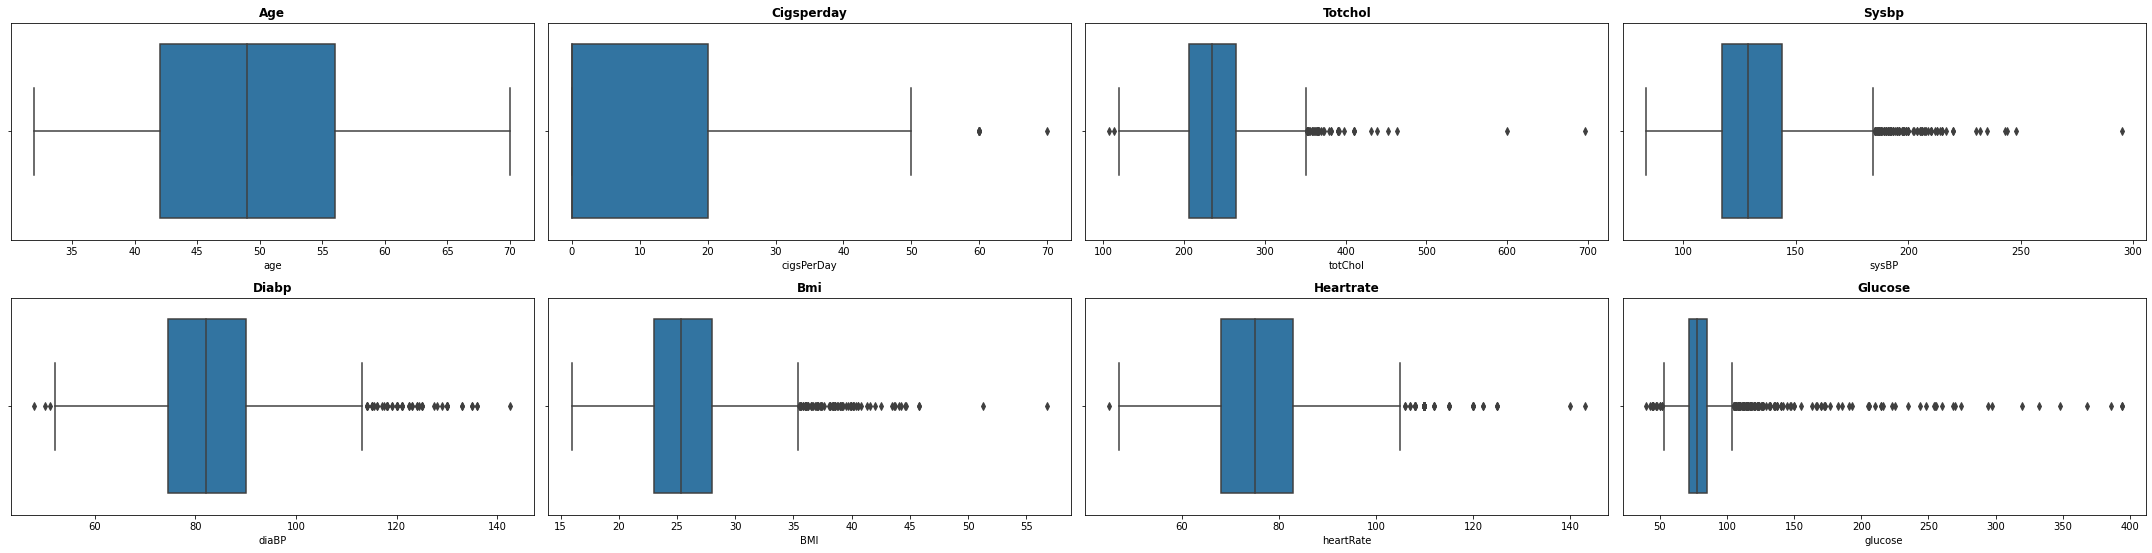

In [215]:
# Chart - 2 visualization code
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_variable):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

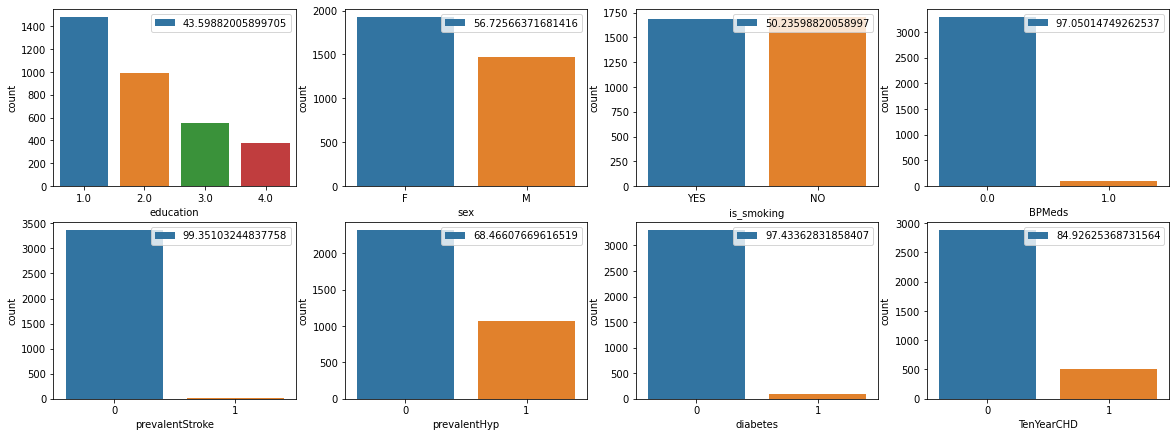

In [216]:
# Chart - 3 visualization code
plt.figure(figsize=(20,15))
for i,j in enumerate(categorical_variable):
  plt.subplot(4,4,i+1)
  sns.countplot(df[j])
  plt.legend(df[j].value_counts()*100/len(df[j]))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Bivariate Analysis

#### Chart - 4

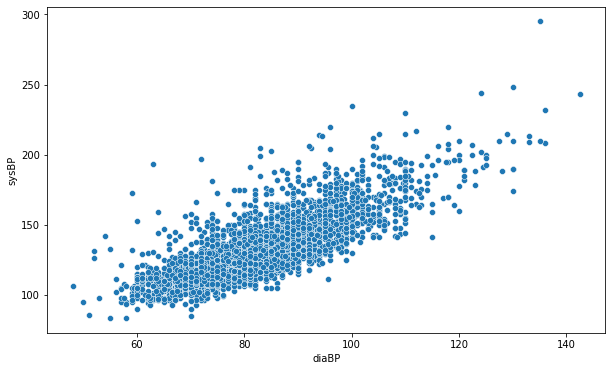

In [217]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(df['diaBP'],df['sysBP'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

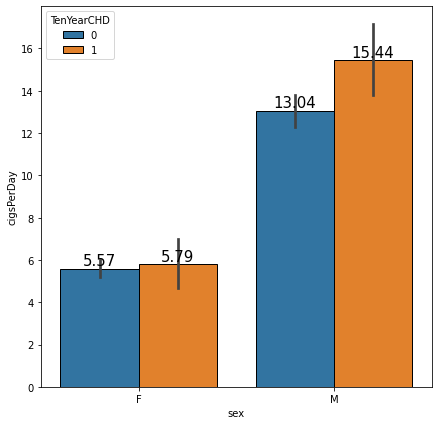

In [218]:
# Chart - 5 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['sex'],y=df['cigsPerDay'],hue=df['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [219]:
df_copied= df.copy()

In [220]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df_copied = df_copied.replace(encoder)

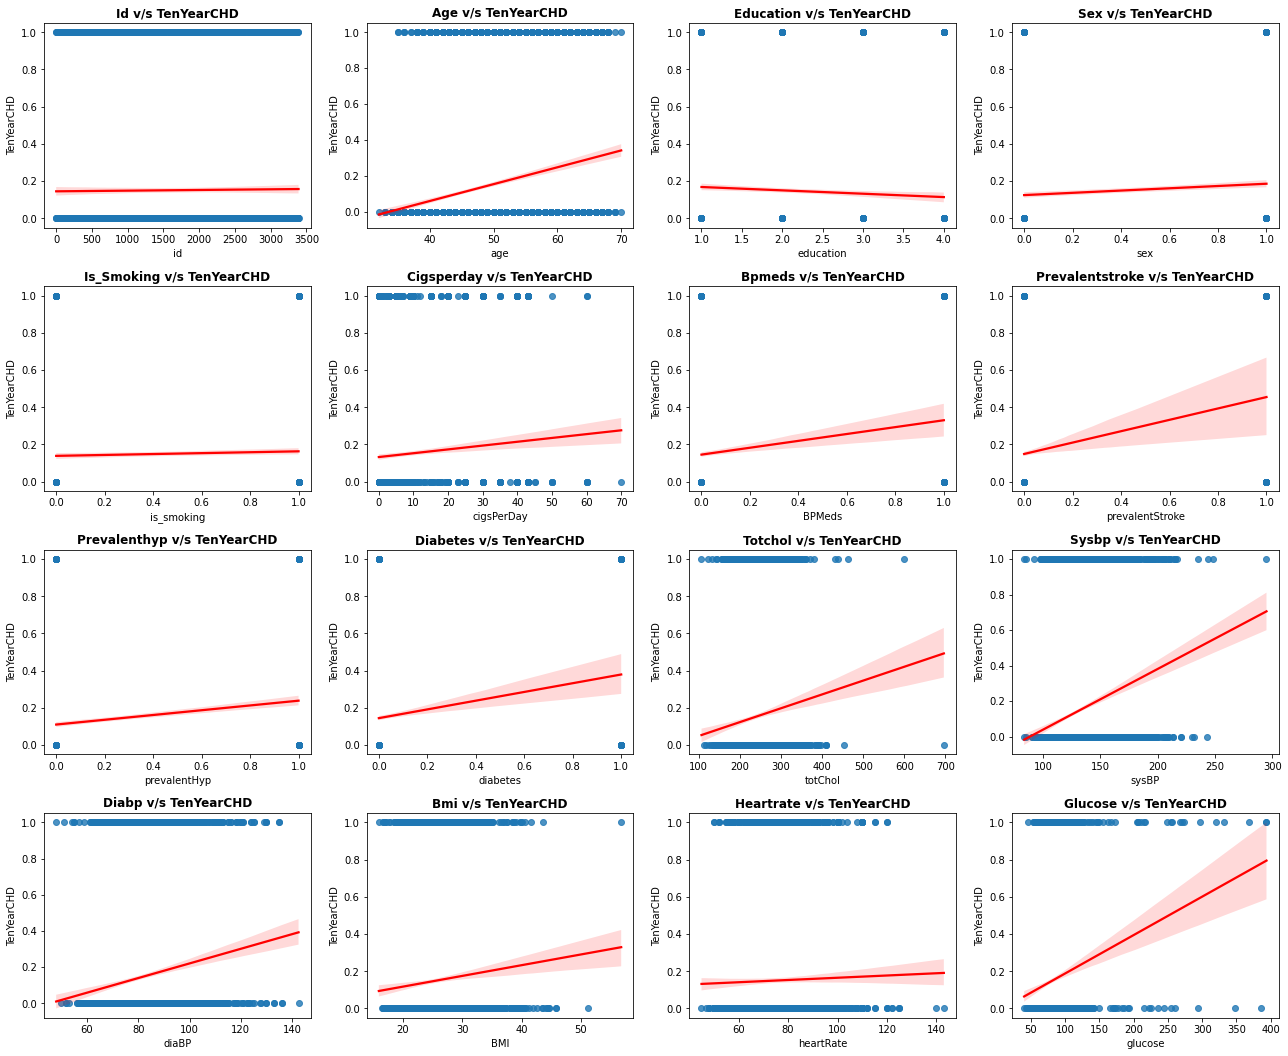

In [221]:
# Chart - 6 visualization code
plt.figure(figsize=(18,18))
for n,column in enumerate(df_copied.columns[:-1] ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df_copied[column], y =df_copied['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

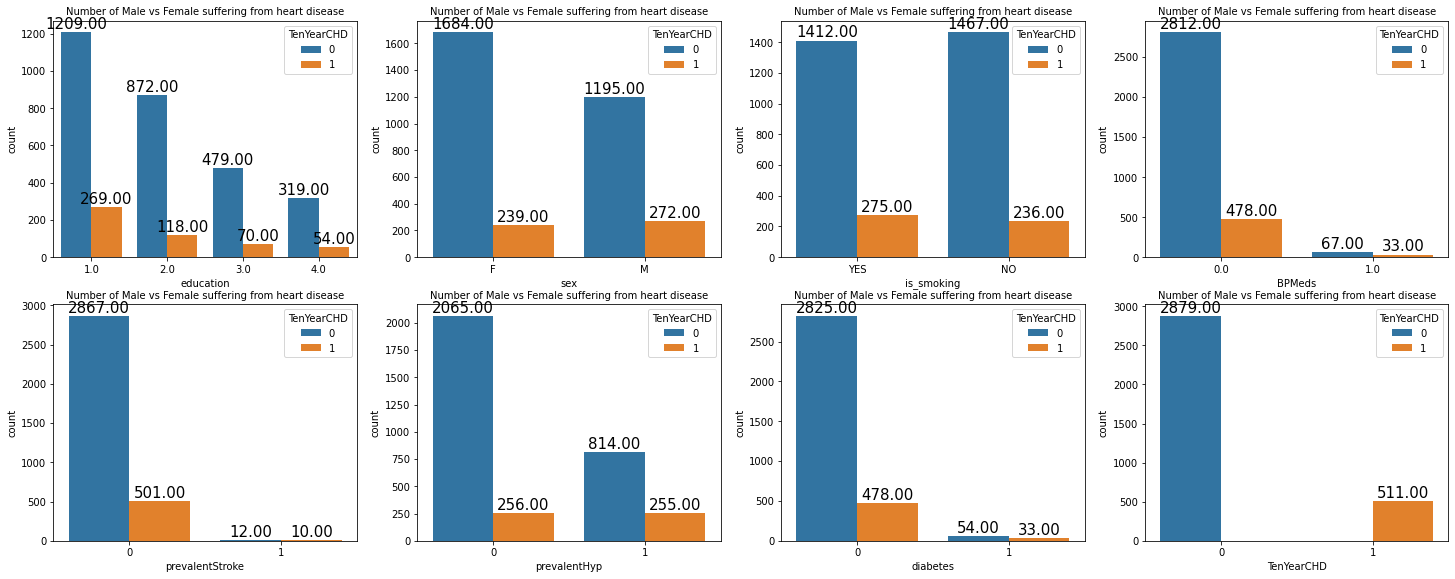

In [222]:
# Chart - 7 visualization code
plt.figure(figsize=(25,20))
for i,j in enumerate(categorical_variable):
  plt.subplot(4,4,i+1)
  plots= sns.countplot(df[j],hue=df['TenYearCHD'])
  plt.title('Number of Male vs Female suffering from heart disease',size=10)

  for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [223]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [224]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [225]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [226]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [227]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [228]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Multivariate Analysis

#### Chart - 14 - Correlation Heatmap

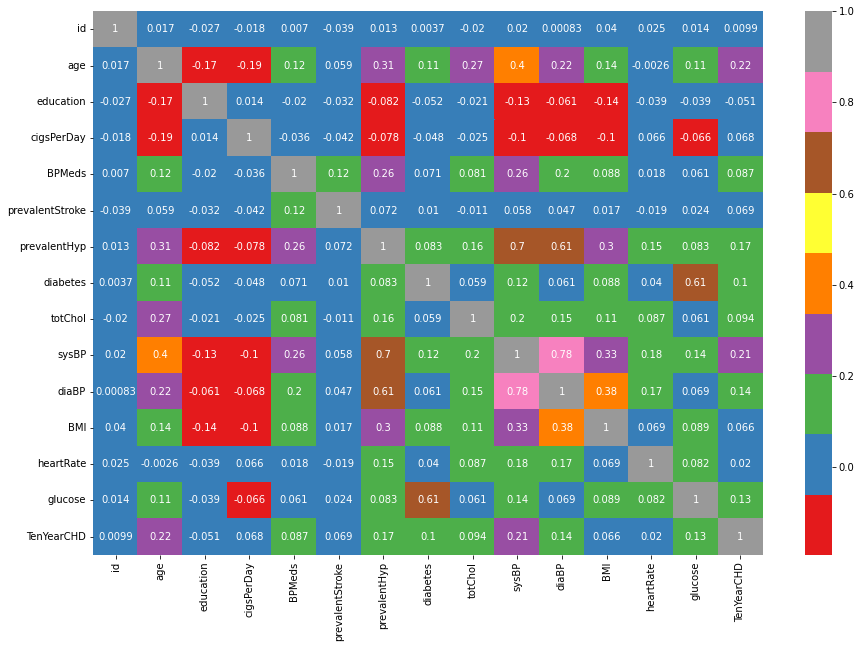

In [229]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

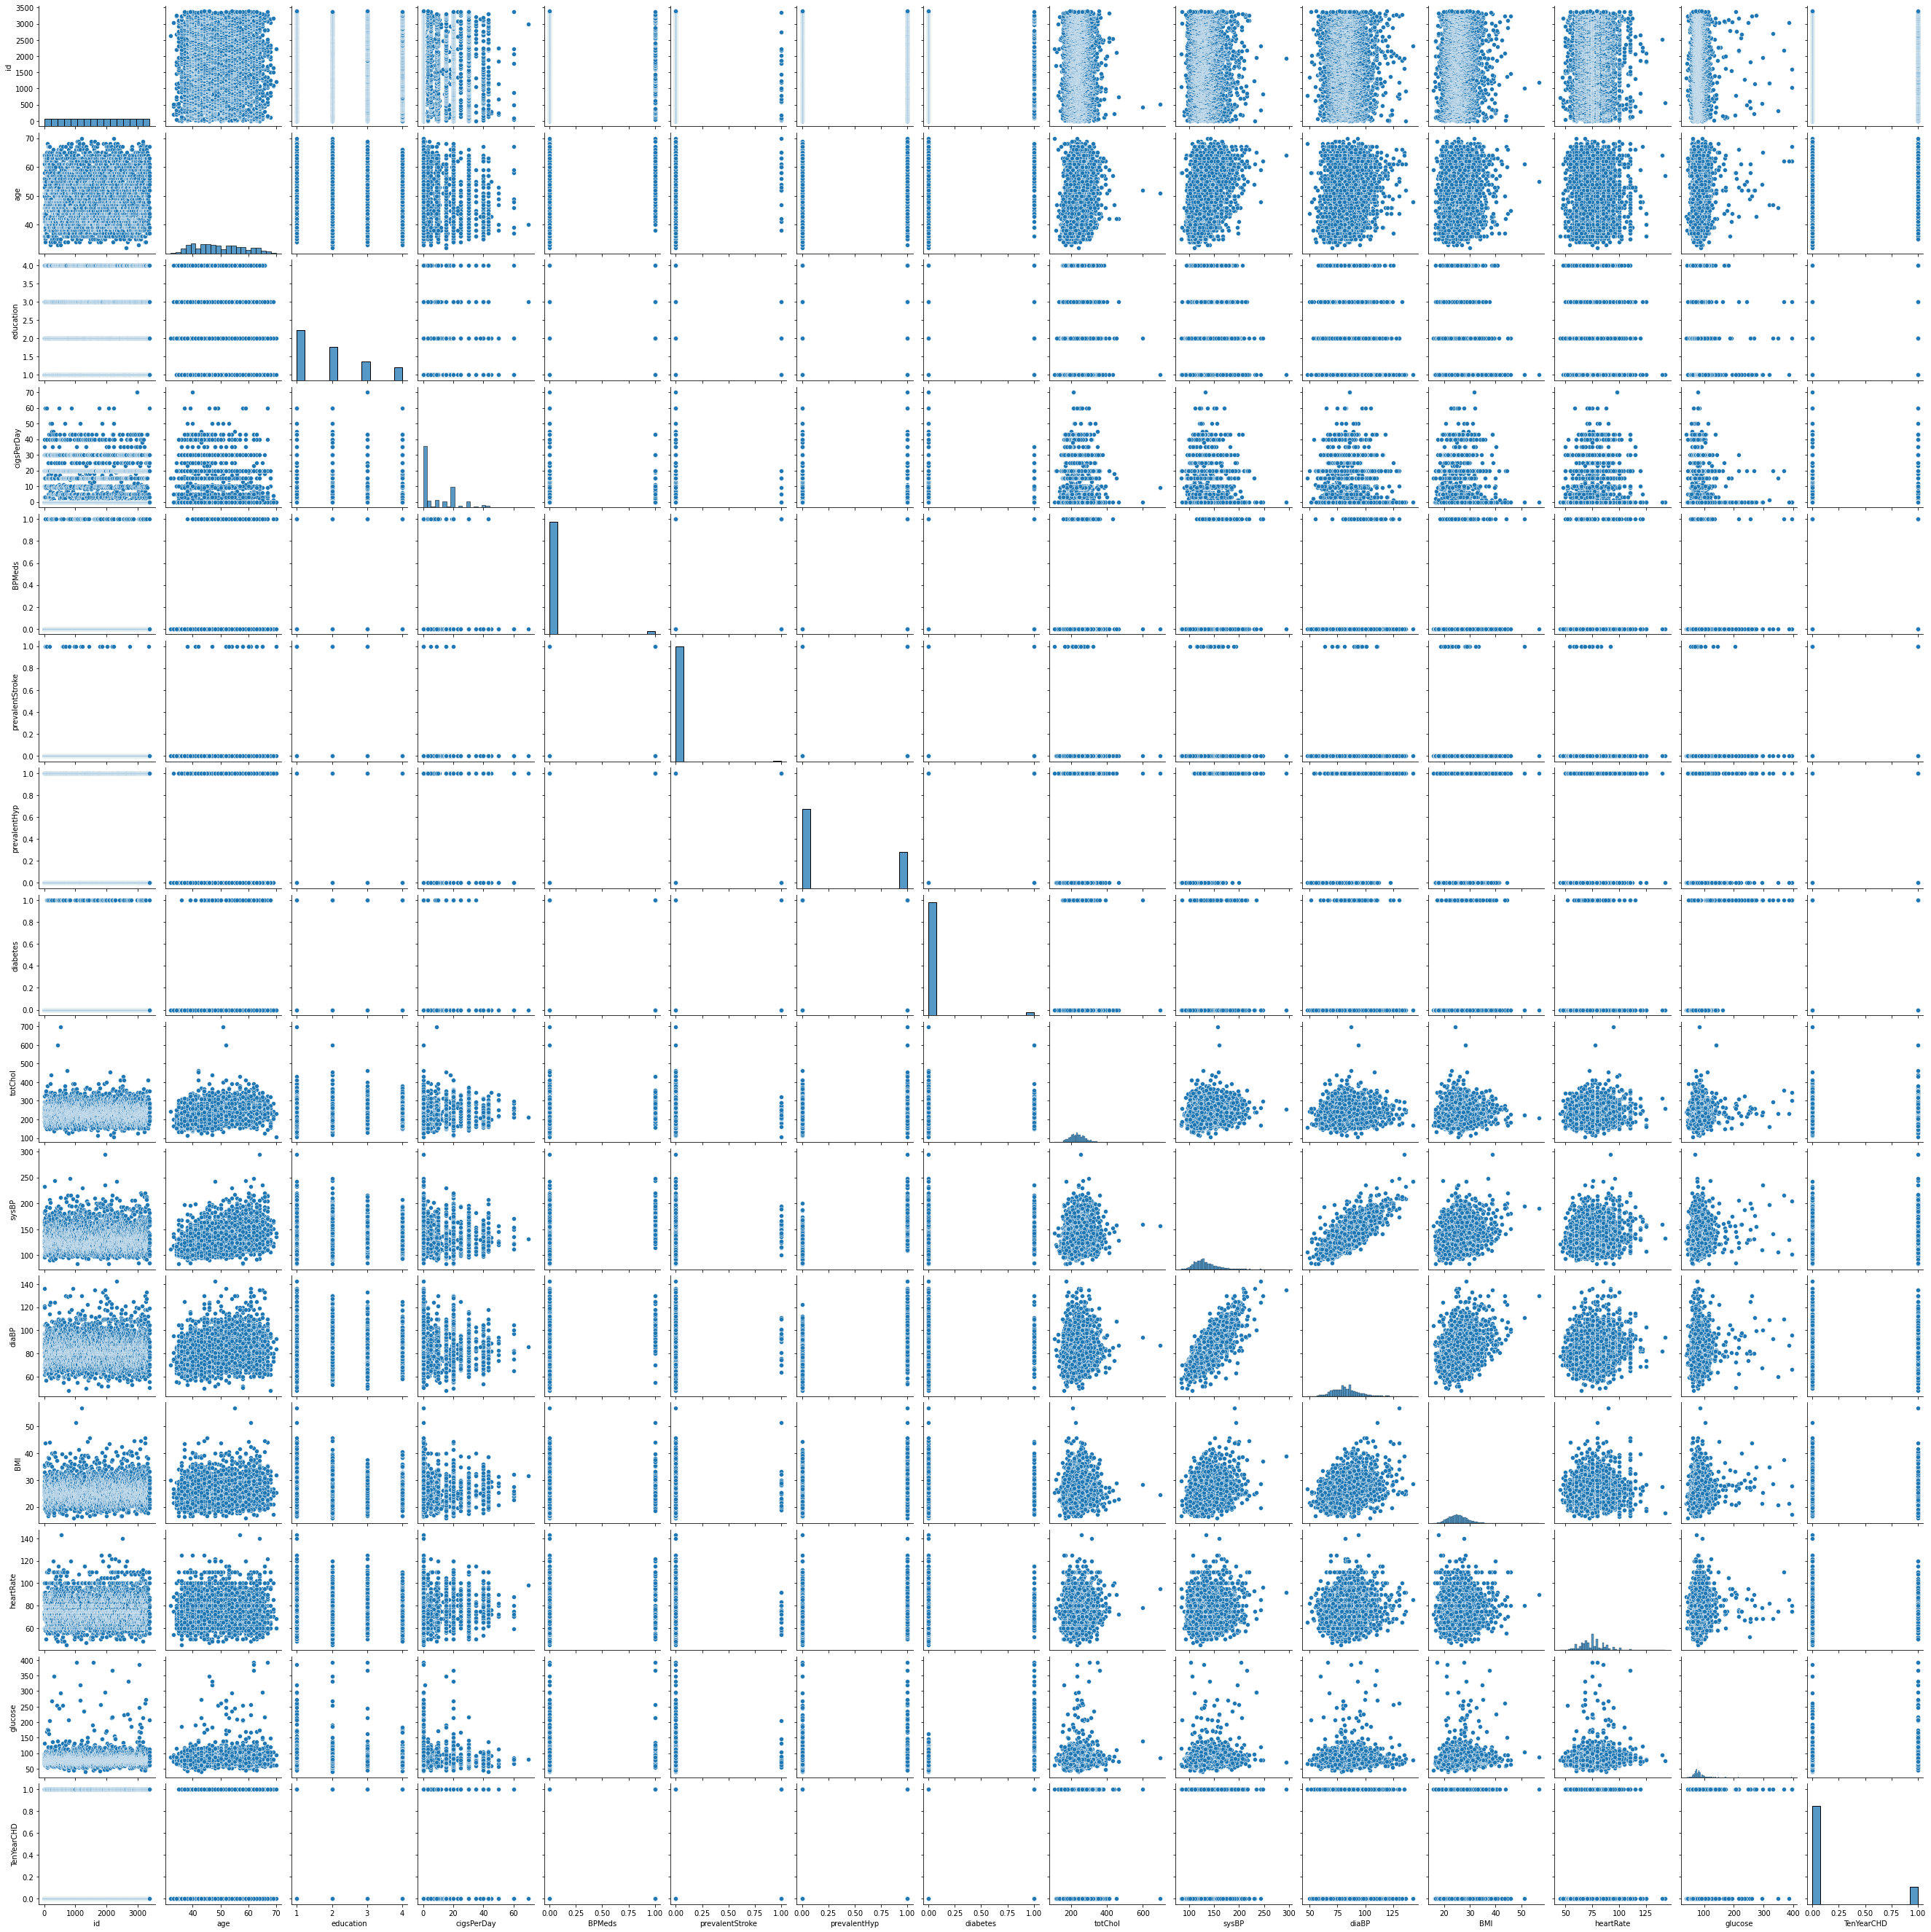

In [230]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We have different statistical tests for different scenarios:

1. Single categorical feature -> One proportion test
2. Two categorical features -> Chi squared test
3. More than two category in categorical features -> ANOVA test
4. One numerical and one categorical(=2 categories) feature-> ANOVA test
5. One numerical feature -> T-test
6. Two numerical feature -> Corelation test
7. One numerical and one categorical(>2 categories) feature -> T-test

1- Null Hypothesis - There is no relation between age and TenYearCHD

Alternate Hypothesis - There is a relationship between age and TenYearCHD

2- Null Hypothesis - There is no relation between diabetes and TenYearCHD

Alternate Hypothesis - There is a relation between diabetes and TenYearCHD

3- Null Hypothesis - There is no relation between heartRate and TenYearCHD

Alternate Hypothesis - There is a relation between heartRate and TenYearCHDSales

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between age and TenYearCHD

Alternate Hypothesis - There is a relationship between age and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [231]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["age"].sample(n=150, random_state=0)
second_sample = df["TenYearCHD"].sample(n=150, random_state=0)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.229, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between diabetes and TenYearCHD

Alternate Hypothesis - There is a relation between diabetes and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [232]:
df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [233]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [234]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [235]:
## We have already treated all the null values above, so we don't have any more null values in our dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

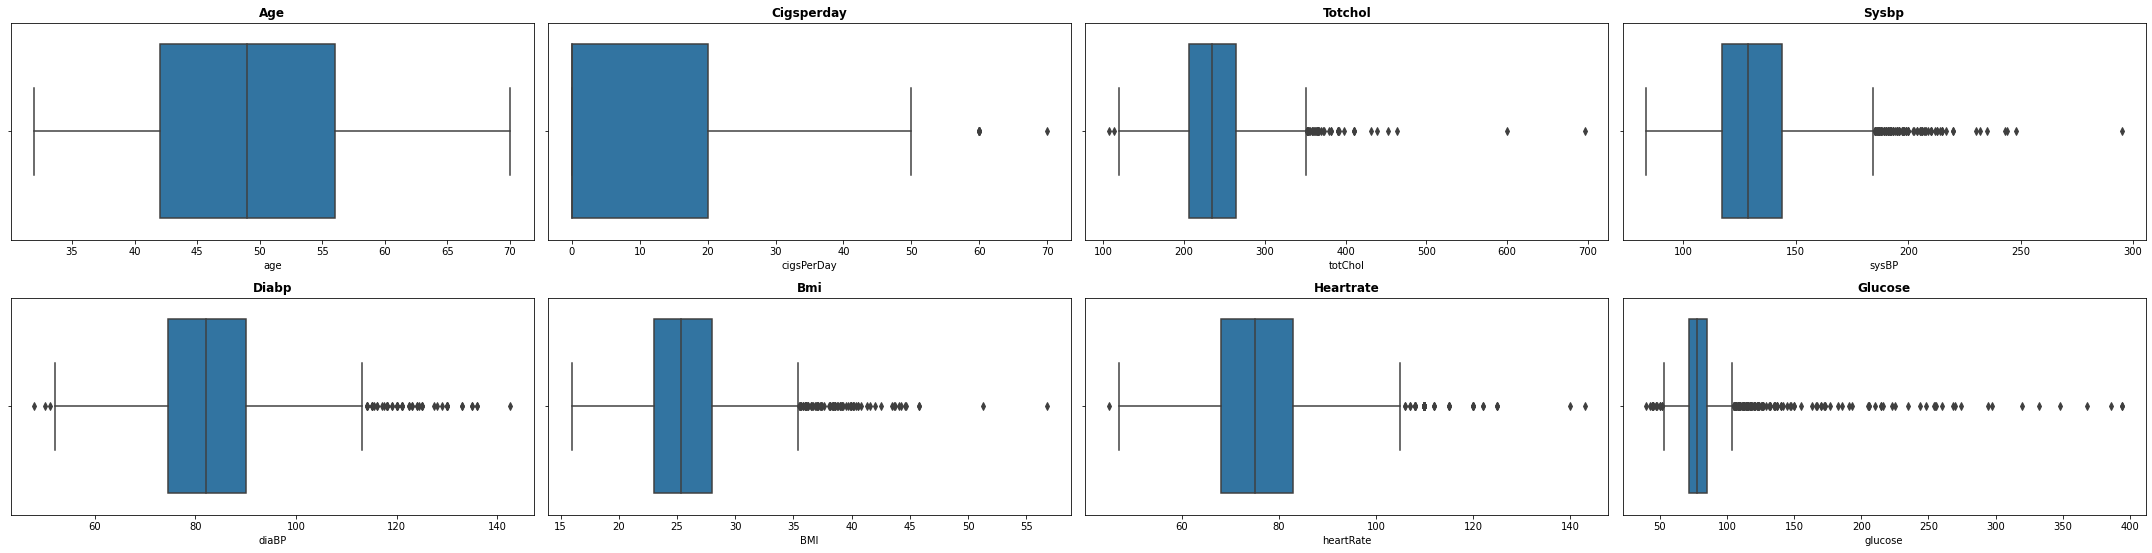

In [236]:
# Plotting box plot for all the continous variable
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_variable):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

It is clear that we have outliers in most of the continous features but still we don't know the percentage of outliers in each of the feature. So, let's create a function that takes input as dataframe and list of continous feature and return the lower limit, upper limit,IQR, total outliers and percentage of outliers present in each continous feature.

In [237]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(df,list_of_continous_feature):
  '''This function can be used to determine the lower limit, upper limit,IQR, total outliers and percentage of outliers present in continous feature and araange them in decending order.
  The first argument it can take is the complete Dataframe and the second is the list of continous variable in the Dataframe'''
  
  outlier_df= pd.DataFrame(columns= ['feature', 'lower_limit', 'upper_limit','IQR', 'total_outliers', 'percentage_outliers(%)'])
  for cont_feature in list_of_continous_feature:
    outliers = []
    df[cont_feature] = sorted(df[cont_feature])
    q1 = np.percentile(df[cont_feature], 25)
    q2 = np.percentile(df[cont_feature], 50)
    q3 = np.percentile(df[cont_feature], 75)

    # Calculating IQR
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    # Total number of outliers
    for i in df[cont_feature]: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)

    # Total percentage of outliers
    perc_outliers= round(len_outliers*100/len(df[cont_feature]),2) 

    # Appending calculated values to respective column
    outlier_df = outlier_df.append({'feature': cont_feature,'lower_limit': lwr_bound, 'upper_limit': upr_bound, 'IQR': IQR, 'total_outliers': len_outliers, 'percentage_outliers(%)': perc_outliers}, ignore_index=True)
  sorted_outlier_df= outlier_df.sort_values(by=['percentage_outliers(%)'],ascending=False)
  return sorted_outlier_df

In [238]:
# Checking the percentage of outliers in each feature
detect_outliers(df,continous_variable)

,feature,lower_limit,upper_limit,IQR,total_outliers,percentage_outliers(%)
7,glucose,52.50000,104.50000,13.0000,214,6.31
3,sysBP,76.50000,184.50000,27.0000,105,3.10
5,BMI,15.57875,35.44875,4.9675,79,2.33
6,heartRate,45.50000,105.50000,15.0000,64,1.89
4,diaBP,51.25000,113.25000,15.5000,58,1.71
2,totChol,119.00000,351.00000,58.0000,43,1.27
1,cigsPerDay,-30.00000,50.00000,20.0000,9,0.27
0,age,21.00000,77.00000,14.0000,0,0.00


Since, it is not good to shift all the outliers into 25-75 interquartile range as the outliers in our dataset are maybe critcal patients. So, let's create 3 dataframes and check the model accuracy

In [239]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(df,list_of_continous_feature):
  for feature in list_of_continous_feature:
    # Calculate the first and third quartiles
    q1,q2,q3 = np.percentile(df[feature], [25,50,75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in df[feature] if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in df[feature]]
    # treated_data_int = [int(absolute) for absolute in treated_data]
    df[feature]= treated_data
  return df

In [240]:
# Defining the function that treats outliers with median value
def treat_outliers_median(df,list_of_continous_feature):
  for feature in list_of_continous_feature:
    # Calculate the first and third quartiles
    q1,q2,q3 = np.percentile(df[feature], [25,50,75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in df[feature] if x < lower_bound or x > upper_bound]
    
    # Treat the outliers with median value
    treated_data = [df[feature].median() if x < lower_bound or x > upper_bound else x for x in df[feature]]
    # treated_data_int = [int(absolute) for absolute in treated_data]
    df[feature]= treated_data
  return df

In [241]:
# Creating three copies of our original dataframe
df_outliers= df.copy()
df_median= df.copy()
df_iqr= df.copy()

Interquatile Range(IQR)

In [242]:
# Checking the percentage of outliers initially
detect_outliers(df_iqr,continous_variable)

,feature,lower_limit,upper_limit,IQR,total_outliers,percentage_outliers(%)
7,glucose,52.50000,104.50000,13.0000,214,6.31
3,sysBP,76.50000,184.50000,27.0000,105,3.10
5,BMI,15.57875,35.44875,4.9675,79,2.33
6,heartRate,45.50000,105.50000,15.0000,64,1.89
4,diaBP,51.25000,113.25000,15.5000,58,1.71
2,totChol,119.00000,351.00000,58.0000,43,1.27
1,cigsPerDay,-30.00000,50.00000,20.0000,9,0.27
0,age,21.00000,77.00000,14.0000,0,0.00


In [243]:
# Treating outliers using IQR technique and capping it to 25-75 percentile
treat_outliers_iqr(df_iqr,continous_variable)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,32,2.0,F,YES,0.0,0.0,0,0,0,206.0,83.5,74.5,15.9600,68.0,72.0,1
1,1,33,4.0,M,NO,0.0,0.0,0,1,0,206.0,83.5,74.5,16.4800,47.0,72.0,0
2,2,33,1.0,F,YES,0.0,0.0,0,0,0,119.0,85.0,74.5,16.5900,48.0,72.0,0
3,3,33,1.0,M,YES,0.0,0.0,0,1,0,124.0,85.5,52.0,16.6100,48.0,72.0,1
4,4,33,1.0,F,YES,0.0,0.0,0,0,0,126.0,90.0,52.0,16.6900,48.0,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,69,1.0,F,NO,20.0,0.0,0,0,0,264.0,144.0,90.0,27.9975,83.0,85.0,0
3386,3386,69,1.0,F,NO,20.0,0.0,0,0,0,264.0,144.0,90.0,27.9975,83.0,85.0,0
3387,3387,69,3.0,M,YES,20.0,0.0,0,1,0,264.0,144.0,90.0,27.9975,83.0,85.0,1
3388,3388,70,1.0,M,NO,20.0,0.0,0,1,0,264.0,144.0,90.0,27.9975,83.0,85.0,0


In [244]:
# Rechecking the percentage of outliers in each feature after treatment
detect_outliers(df_iqr,continous_variable)

,feature,lower_limit,upper_limit,IQR,total_outliers,percentage_outliers(%)
0,age,21.000000,77.000000,14.000000,0,0.0
1,cigsPerDay,-30.000000,50.000000,20.000000,0,0.0
2,totChol,119.000000,351.000000,58.000000,0,0.0
3,sysBP,76.500000,184.500000,27.000000,0,0.0
4,diaBP,51.250000,113.250000,15.500000,0,0.0
5,BMI,15.581563,35.444062,4.965625,0,0.0
6,heartRate,45.500000,105.500000,15.000000,0,0.0
7,glucose,52.500000,104.500000,13.000000,0,0.0


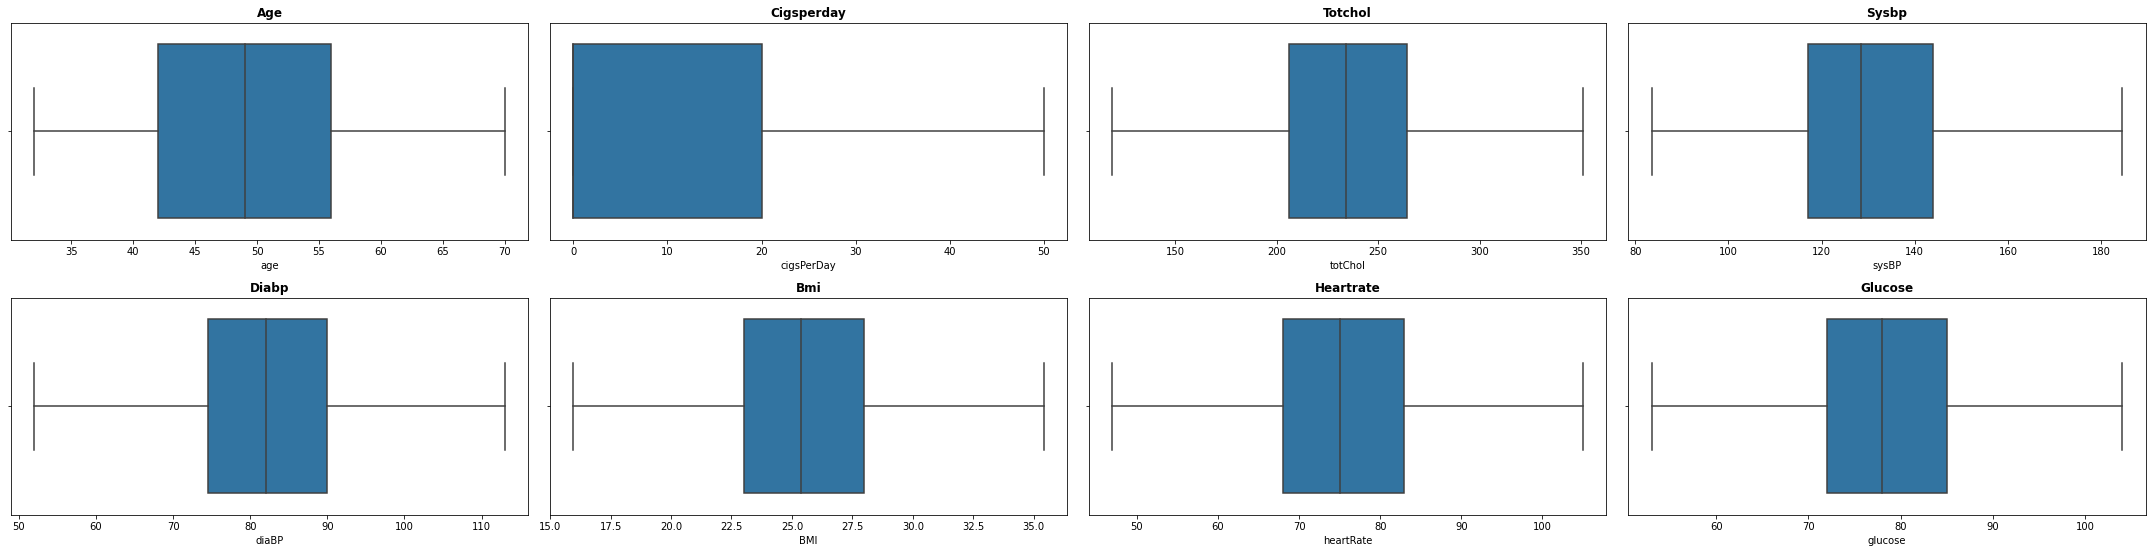

In [245]:
# Rechecking the outlier visually after IQR treatment
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_variable):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df_iqr[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Outlier Median Treatment

In [246]:
# Checking the percentage of outliers in each feature before median replacement
detect_outliers(df_median,continous_variable)

,feature,lower_limit,upper_limit,IQR,total_outliers,percentage_outliers(%)
7,glucose,52.50000,104.50000,13.0000,214,6.31
3,sysBP,76.50000,184.50000,27.0000,105,3.10
5,BMI,15.57875,35.44875,4.9675,79,2.33
6,heartRate,45.50000,105.50000,15.0000,64,1.89
4,diaBP,51.25000,113.25000,15.5000,58,1.71
2,totChol,119.00000,351.00000,58.0000,43,1.27
1,cigsPerDay,-30.00000,50.00000,20.0000,9,0.27
0,age,21.00000,77.00000,14.0000,0,0.00


In [247]:
# Treating outliers by replacing it with median values of each feature
treat_outliers_median(df_median,continous_variable)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,32,2.0,F,YES,0.0,0.0,0,0,0,234.0,83.5,82.0,15.96,75.0,78.0,1
1,1,33,4.0,M,NO,0.0,0.0,0,1,0,234.0,83.5,82.0,16.48,47.0,78.0,0
2,2,33,1.0,F,YES,0.0,0.0,0,0,0,119.0,85.0,82.0,16.59,48.0,78.0,0
3,3,33,1.0,M,YES,0.0,0.0,0,1,0,124.0,85.5,52.0,16.61,48.0,78.0,1
4,4,33,1.0,F,YES,0.0,0.0,0,0,0,126.0,90.0,52.0,16.69,48.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,69,1.0,F,NO,0.0,0.0,0,0,0,234.0,128.5,82.0,25.38,75.0,78.0,0
3386,3386,69,1.0,F,NO,0.0,0.0,0,0,0,234.0,128.5,82.0,25.38,75.0,78.0,0
3387,3387,69,3.0,M,YES,0.0,0.0,0,1,0,234.0,128.5,82.0,25.38,75.0,78.0,1
3388,3388,70,1.0,M,NO,0.0,0.0,0,1,0,234.0,128.5,82.0,25.38,75.0,78.0,0


In [248]:
# Rechecking the percentage of outliers in each feature after treatment
detect_outliers(df_median,continous_variable)

,feature,lower_limit,upper_limit,IQR,total_outliers,percentage_outliers(%)
7,glucose,55.50,99.50,11.0,106,3.13
3,sysBP,81.00,177.00,24.0,50,1.47
5,BMI,15.98,34.78,4.7,23,0.68
4,diaBP,52.75,110.75,14.5,18,0.53
6,heartRate,47.00,103.00,14.0,10,0.29
2,totChol,122.00,346.00,56.0,5,0.15
0,age,21.00,77.00,14.0,0,0.00
1,cigsPerDay,-30.00,50.00,20.0,0,0.00


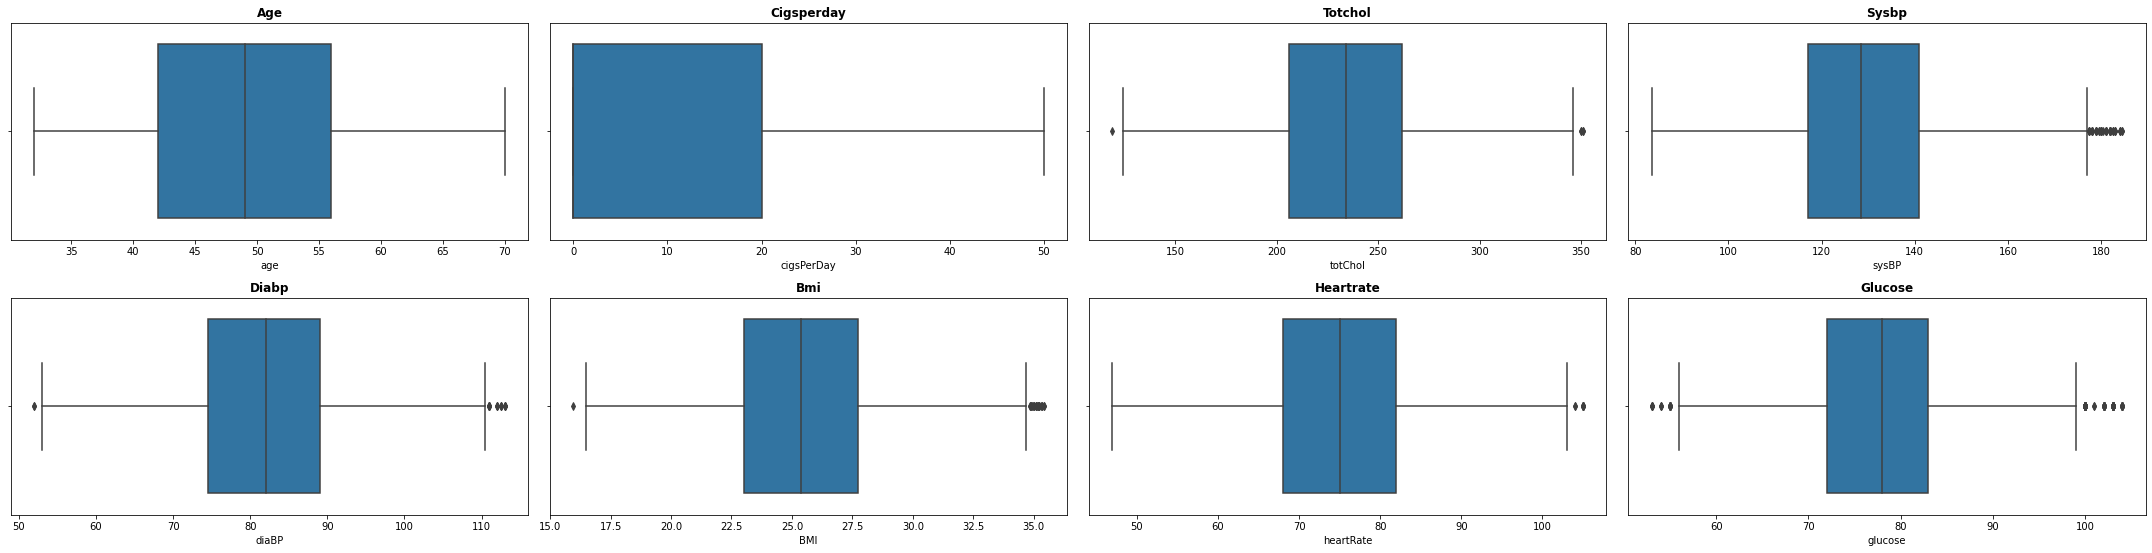

In [249]:
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_variable):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df_median[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [250]:
# Encode your categorical columns
df_outliers['sex'].replace({'M':0,'F':1},inplace=True)
df_outliers['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [251]:
# Encode your categorical columns
df_iqr['sex'].replace({'M':0,'F':1},inplace=True)
df_iqr['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [252]:
# Encode your categorical columns
df_median['sex'].replace({'M':0,'F':1},inplace=True)
df_median['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [253]:
# Expand Contraction

#### 2. Lower Casing

In [254]:
# Lower Casing

#### 3. Removing Punctuations

In [255]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [256]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [257]:
# Remove Stopwords

In [258]:
# Remove White spaces

#### 6. Rephrase Text

In [259]:
# Rephrase Text

#### 7. Tokenization

In [260]:
# Tokenization

#### 8. Text Normalization

In [261]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [262]:
# POS Taging

#### 10. Text Vectorization

In [263]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [312]:
# Manipulate Features to minimize feature correlation and create new features
df_outliers.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,32,2.0,1,1,0.0,0.0,0,0,0,107.0,83.5,48.0,15.96,45.0,40.0,1
1,1,33,4.0,0,0,0.0,0.0,0,1,0,113.0,83.5,50.0,16.48,47.0,43.0,0
2,2,33,1.0,1,1,0.0,0.0,0,0,0,119.0,85.0,51.0,16.59,48.0,44.0,0
3,3,33,1.0,0,1,0.0,0.0,0,1,0,124.0,85.5,52.0,16.61,48.0,44.0,1
4,4,33,1.0,1,1,0.0,0.0,0,0,0,126.0,90.0,52.0,16.69,48.0,45.0,0


#### 2. Feature Selection

In [265]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [266]:
# Transform Your data

### 6. Data Scaling

In [267]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [268]:
# Scaling your data
# Separating "x" and "y" variables
x1= df_outliers[['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
y1= df_outliers[['TenYearCHD']]
print(x1.shape)
print(y1.shape)

(3390, 16)
(3390, 1)


In [269]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

# Creating object
std_classifier= StandardScaler()

# Fit and Transform
x1= std_classifier.fit_transform(x1)

In [270]:
# Scaling your data
# Separating "x" and "y" variables
x2= df_iqr[['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
y2= df_iqr[['TenYearCHD']]
print(x2.shape)
print(y2.shape)

(3390, 16)
(3390, 1)


In [271]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

# Creating object
std_classifier= StandardScaler()

# Fit and Transform
x2= std_classifier.fit_transform(x2)

In [272]:
# Scaling your data
# Separating "x" and "y" variables
x3= df_median[['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
y3= df_median[['TenYearCHD']]
print(x3.shape)
print(y3.shape)

(3390, 16)
(3390, 1)


In [273]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

# Creating object
std_classifier= StandardScaler()

# Fit and Transform
x3= std_classifier.fit_transform(x3)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [274]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [275]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Spliting the dataset
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [276]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Spliting the dataset
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [277]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Spliting the dataset
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=0)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [278]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [304]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LogisticRegression

# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()

# Fit the Algorithm
logistic_classifier.fit(x1_train,y1_train)

# Predict the model
y1_train_regression_pred= logistic_classifier.predict(x1_train)
y1_test_regression_pred= logistic_classifier.predict(x1_test)

In [305]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(roc_auc_score(y1_train,y1_train_regression_pred))
print(roc_auc_score(y1_test,y1_test_regression_pred))

print(accuracy_score(y1_train,y1_train_regression_pred))
print(accuracy_score(y1_test,y1_test_regression_pred))

print(recall_score(y1_train,y1_train_regression_pred))
print(recall_score(y1_test,y1_test_regression_pred))

print(precision_score(y1_train,y1_train_regression_pred))
print(precision_score(y1_test,y1_test_regression_pred))

0.5164752407702516
0.5118098365049584
0.8521386430678466
0.8466076696165191
0.036855036855036855
0.028846153846153848
0.625
0.5


In [306]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LogisticRegression

# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()

# Fit the Algorithm
logistic_classifier.fit(x2_train,y2_train)

# Predict the model
y2_train_regression_pred= logistic_classifier.predict(x2_train)
y2_test_regression_pred= logistic_classifier.predict(x2_test)

In [307]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

print(roc_auc_score(y2_train,y2_train_regression_pred))
print(roc_auc_score(y2_test,y2_test_regression_pred))

print(accuracy_score(y2_train,y2_train_regression_pred))
print(accuracy_score(y2_test,y2_test_regression_pred))

print(recall_score(y2_train,y2_train_regression_pred))
print(recall_score(y2_test,y2_test_regression_pred))

print(precision_score(y2_train,y2_train_regression_pred))
print(precision_score(y2_test,y2_test_regression_pred))

0.5152467395417504
0.5118098365049584
0.8517699115044248
0.8466076696165191
0.0343980343980344
0.028846153846153848
0.6086956521739131
0.5


In [308]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LogisticRegression

# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()

# Fit the Algorithm
logistic_classifier.fit(x3_train,y3_train)

# Predict the model
y3_train_regression_pred= logistic_classifier.predict(x3_train)
y3_test_regression_pred= logistic_classifier.predict(x3_test)

In [309]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

print(roc_auc_score(y3_train,y3_train_regression_pred))
print(roc_auc_score(y3_test,y3_test_regression_pred))

print(accuracy_score(y3_train,y3_train_regression_pred))
print(accuracy_score(y3_test,y3_test_regression_pred))

print(recall_score(y3_train,y3_train_regression_pred))
print(recall_score(y3_test,y3_test_regression_pred))

print(precision_score(y3_train,y3_train_regression_pred))
print(precision_score(y3_test,y3_test_regression_pred))

0.5164752407702516
0.5118098365049584
0.8521386430678466
0.8466076696165191
0.036855036855036855
0.028846153846153848
0.625
0.5


In [282]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [283]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [284]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [285]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [286]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [287]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [288]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [289]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [290]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [291]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***